In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path =  "netflix_users.csv" 
df = pd.read_csv(file_path)


In [9]:
df.sample(5) 

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
5716,5717,Chris Hernandez,32,Canada,Premium,680.43,Sci-Fi,2024-09-10
488,489,Jane Martinez,23,Brazil,Standard,150.40,Romance,2024-11-24
2302,2303,Michael Johnson,63,India,Basic,759.51,Romance,2024-04-09
3808,3809,Alex Smith,60,Brazil,Standard,90.00,Action,2024-05-14
4665,4666,Chris Davis,56,Canada,Premium,514.86,Drama,2024-08-13


In [11]:
# Understanding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User_ID            25000 non-null  int64  
 1   Name               25000 non-null  object 
 2   Age                25000 non-null  int64  
 3   Country            25000 non-null  object 
 4   Subscription_Type  25000 non-null  object 
 5   Watch_Time_Hours   25000 non-null  float64
 6   Favorite_Genre     25000 non-null  object 
 7   Last_Login         25000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.5+ MB


In [13]:
df.nunique()

User_ID              25000
Name                   100
Age                     68
Country                 10
Subscription_Type        3
Watch_Time_Hours     22087
Favorite_Genre           7
Last_Login             366
dtype: int64

In [15]:
df.describe()

,User_ID,Age,Watch_Time_Hours
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,46.482880,500.468858
std,7217.022701,19.594861,286.381815
min,1.000000,13.000000,0.120000
25%,6250.750000,29.000000,256.567500
50%,12500.500000,46.000000,501.505000
75%,18750.250000,63.000000,745.732500
max,25000.000000,80.000000,999.990000


In [17]:
# Checking for Missing Values
df.isnull().sum()

User_ID              0
Name                 0
Age                  0
Country              0
Subscription_Type    0
Watch_Time_Hours     0
Favorite_Genre       0
Last_Login           0
dtype: int64

In [19]:
# Avg Watch-time of each subscription type
print(df.groupby('Subscription_Type')['Watch_Time_Hours'].mean())

Subscription_Type
Basic       502.994617
Premium     501.409387
Standard    496.949376
Name: Watch_Time_Hours, dtype: float64


In [21]:
# Number of users watching each Genre
print(df['Favorite_Genre'].value_counts())

Favorite_Genre
Horror         3654
Documentary    3636
Action         3589
Romance        3572
Comedy         3561
Drama          3533
Sci-Fi         3455
Name: count, dtype: int64


In [23]:
# Oldest and youngest user age
print(f"Oldest user age: {df['Age'].max()}")
print(f"Youngest user age: {df['Age'].min()}")

Oldest user age: 80
Youngest user age: 13


In [25]:
# Number of inactive users since Dec 2024
df['Last_Login'] = pd.to_datetime(df['Last_Login'])  # Convert to datetime
inactive_users = df[df['Last_Login'] < '2024-12-01']  # Users who haven't logged in since Dec 2024
print(f"Number of inactive users: {len(inactive_users)}")


Number of inactive users: 18220


In [27]:
# Number of inactive users since Dec 2024 in each subscription type
inactive_by_subscription = inactive_users['Subscription_Type'].value_counts()
verifying_total = inactive_users['Subscription_Type'].value_counts().sum()

print("Number of inactive users by Subscription Type:")
print(inactive_by_subscription)
print("Total:", verifying_total)

Number of inactive users by Subscription Type:
Subscription_Type
Premium     6174
Basic       6120
Standard    5926
Name: count, dtype: int64
Total: 18220


In [29]:
# Number of users from each country
print(df['Country'].value_counts().head(5))

Country
UK         2592
Germany    2547
India      2505
USA        2503
Brazil     2503
Name: count, dtype: int64


In [31]:
# Average watch time per group (divided based on age)
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['Teen', 'Young Adult', 'Adult', 'Senior'])
print(df.groupby('Age_Group', observed=False)['Watch_Time_Hours'].mean())

Age_Group
Teen           492.229237
Young Adult    498.340654
Adult          501.478077
Senior         502.302731
Name: Watch_Time_Hours, dtype: float64


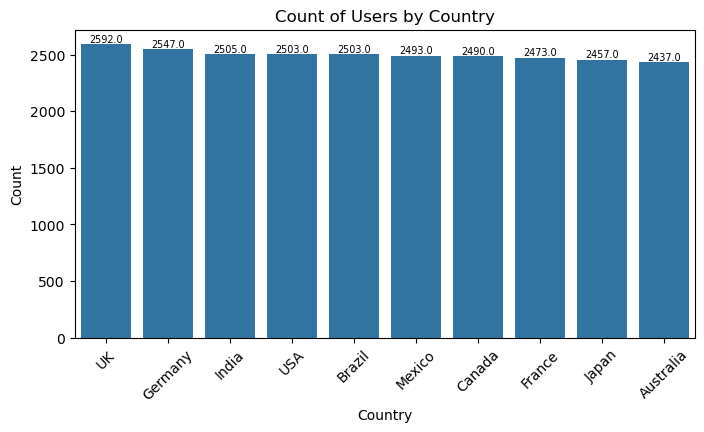

In [33]:
# Setting up the plotting area
plt.figure(figsize=(8, 4))

# Count plot for Country and Subscription_Type

ax1 = sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=7, fontweight='light')

plt.title('Count of Users by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


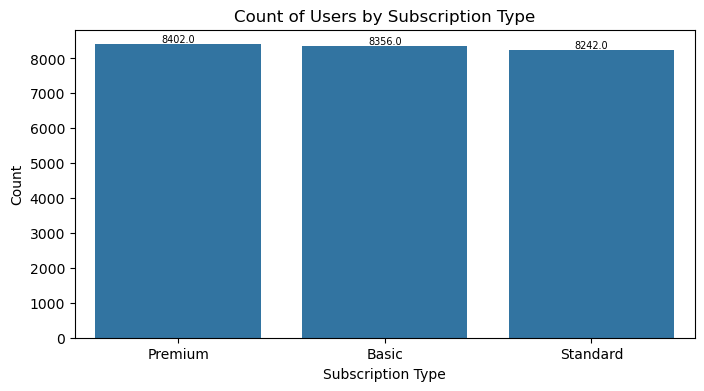

In [35]:
# Count plot for Country and Subscription_Type
plt.figure(figsize=(8, 4))
# Adding labels on top of each bar
ax2 = sns.countplot(data=df, x='Subscription_Type', order=df['Subscription_Type'].value_counts().index)
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() /2, p.get_height()), 
                ha='center', va='bottom', fontsize=7, fontweight='light')
    
plt.title('Count of Users by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.show()

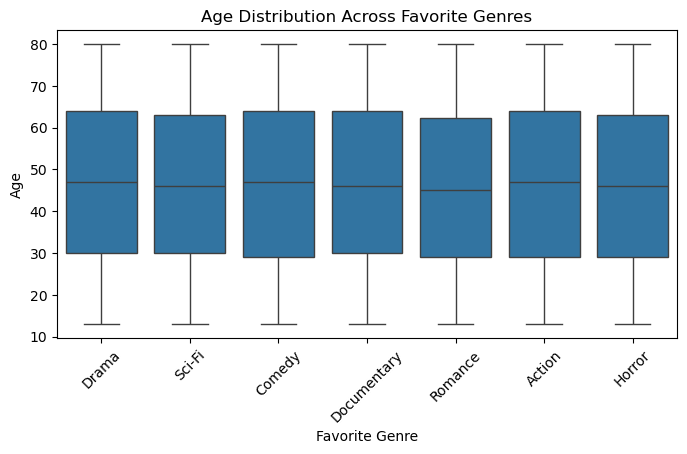

In [37]:
 # distribution of users' ages for each favorite genre
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Favorite_Genre', y='Age')

# Customize the plot
plt.title('Age Distribution Across Favorite Genres')
plt.xlabel('Favorite Genre')
plt.ylabel('Age')
plt.xticks(rotation=45)  # Rotate x labels for readability
plt.show()